<a href="https://colab.research.google.com/github/LuaraMarino/Trabalhinhos/blob/main/MachineLearning_CheckPoint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

O dataset mapeia características de pessoas cruzando com o valor pago pelo seu seguro de saúde nos EUA. Os dados são compostos pelas seguintes variáveis: 

- `age` : idade do indivíduo 
- `sex` : sexo do indivíduo 
- `bmi` : "Body mass index", o IMC (índice de massa corporal)
- `children` : número de filhos
- `smoker` : fumante ou não?
- `region` : região de residência da pessoa
- `charges` : tarifa paga pela pessoa

Os dados podem ser lidos diretamente a partir desta URL: https://tinyurl.com/42rvaw4p


## Atividades 

A partir da leitura do dataset, realize as seguintes tarefas: 

### Gerais 

1. Faça uma análise descritiva geral dos dados, para se familirizar com o dataset 

### Gráficos 

Lembrem-se! Todo gráfico precisa ter um título, o nome do Eixo X e do Eixo Y! Estas alterações nos gráficos são **obrigatórias**. Outras alterações de layout são bem-vindas, e podem gerar nota extra ;D

2. Faça um histograma com as idades das pessoas
3. Faça uma gráfico com a distribuição das pessoas por sexo
4. Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto 
5. Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável "sex"
6. Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro _hue_ ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões? 


### Filtros de dataframes 

7. Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc. 
8. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes


### Regressão linear 

9. Padronize as features do dataset 
10. Execute uma regressão linear simples usando todas as features (o label é o valor pago do seguro). Calcule o `R2 score` e interprete o valor desta métrica

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

##Gerais
1.Faça uma análise descritiva geral dos dados, para se familirizar com o dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
df["age"].values

array([19, 18, 28, ..., 18, 21, 61])

In [ ]:
df[df["smoker"] == "yes"]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

##Gráficos
Lembrem-se! Todo gráfico precisa ter um título, o nome do Eixo X e do Eixo Y! Estas alterações nos gráficos são obrigatórias. Outras alterações de layout são bem-vindas, e podem gerar nota extra ;D

1.Faça um histograma com as idades das pessoas

2.Faça uma gráfico com a distribuição das pessoas por sexo

3.Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto

4.Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y)

5.Defina a cor dos pontos pela variável "sex"

6.Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro hue ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões?

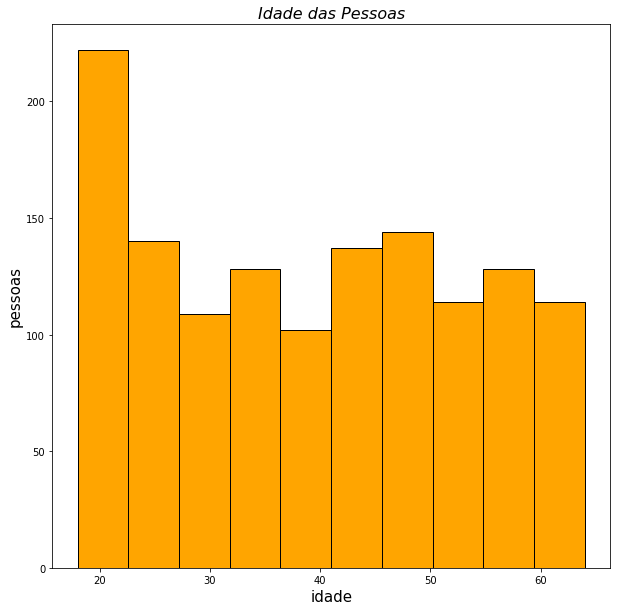

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Idade das Pessoas', fontsize=16, fontstyle='italic')
ax.hist(df['age'], color='orange', edgecolor='black')
ax.set_xlabel('idade', fontsize=15)
ax.set_ylabel('pessoas', fontsize=15)

plt.show()

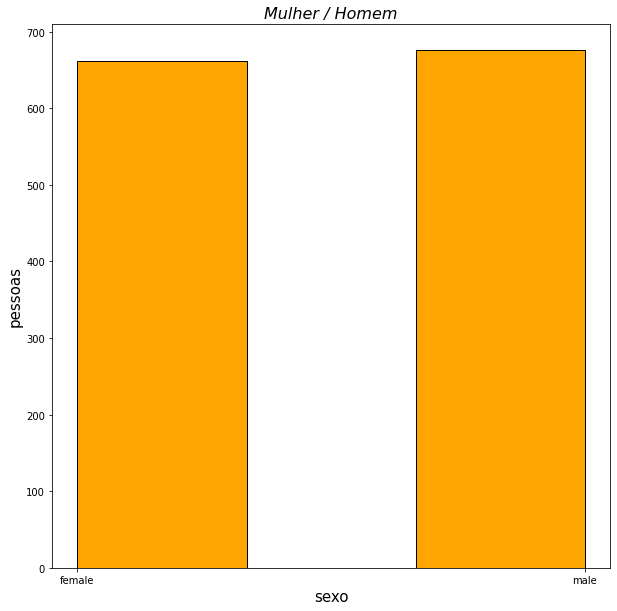

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Mulher / Homem', fontsize=16, fontstyle='italic')
ax.hist(df['sex'], color='orange', edgecolor='black', bins=3)
ax.set_xlabel('sexo', fontsize=15)
ax.set_ylabel('pessoas', fontsize=15)
#ax.set_ylim([600,700])
plt.show()

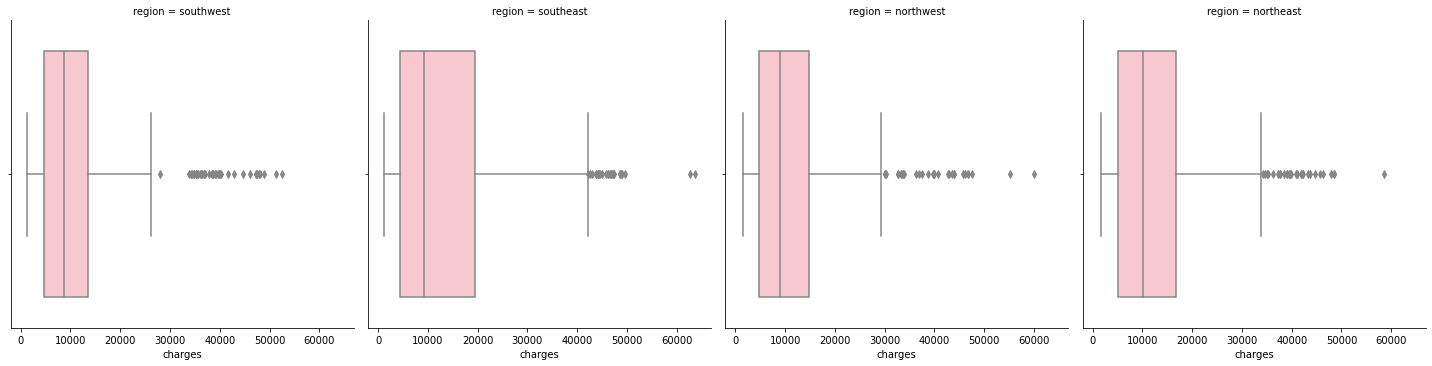

In [ ]:
ax = sns.catplot(data = df, x="charges", col="region", kind="box", color='pink');

Text(0, 0.5, 'Charges')

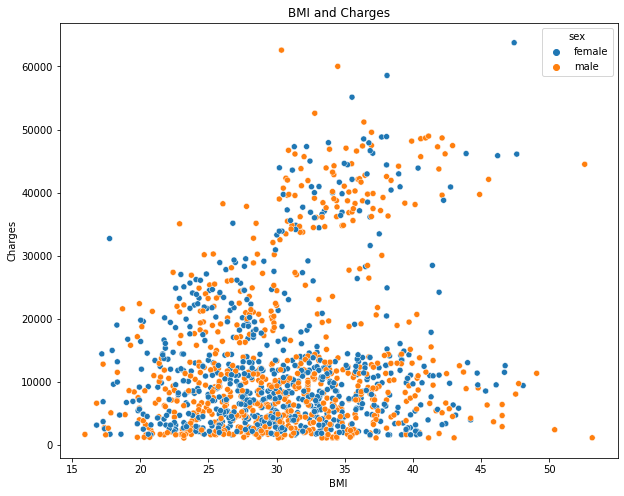

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.scatterplot(data=df, x="bmi", y="charges", hue="sex")
ax.set_title('BMI and Charges')
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')

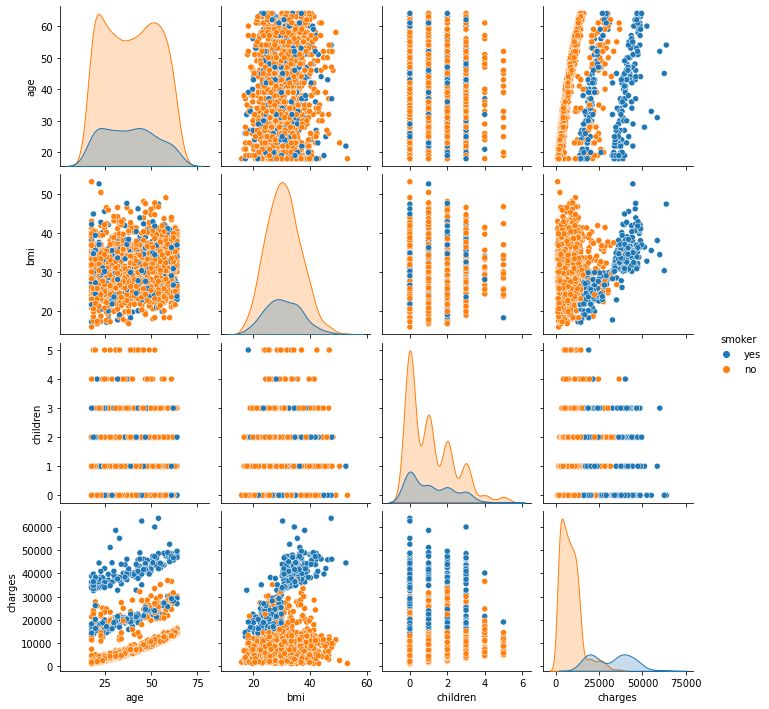

In [ ]:
sns.pairplot(df, hue="smoker")
#Em Age, as pessoas entre 18 a 60 anos pagam mais se forem fumantes.
#No bmi, os fumantes entre 20 a 60 bmi pagam maior tarifa e os fumantes entre 20 a 30 bmi pagam menos tarifa.
#Children, pessoas fumantes com 0 a 3 filhos pagam uma tarifa maior e as pessoas que tem entre 4 a 6 filhos geralmente não são fumantes.
#Concluimos que pessoas fumantes costumam pagar tarifas maiores.

##Filtros de dataframes
7. Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. 
8.Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc.
Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes

In [ ]:
df['charges'].mean()

13270.422265141257

In [ ]:
df2 = df

In [ ]:
df2_filtered = df2[df2['charges'] >= (df['charges'].mean())]

In [ ]:
df2_filtered

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
...,...,...,...,...,...,...,...
1318,35,male,39.710,4,no,northeast,19496.71917
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630
1328,23,female,24.225,2,no,northeast,22395.74424


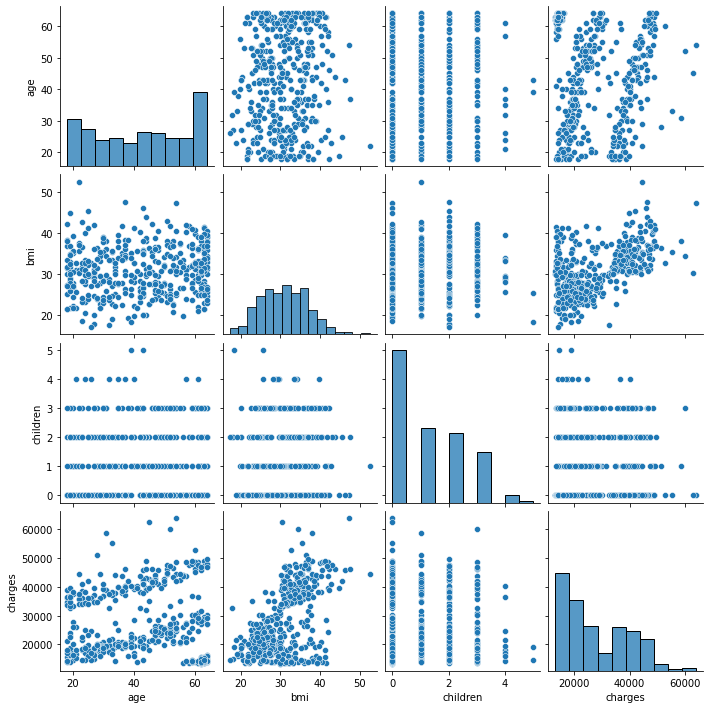

In [ ]:
sns.pairplot(df2_filtered)

In [ ]:
df2_filtered['age'].mean()

42.464285714285715

In [ ]:
df2_filtered['sex'].value_counts()

male      221
female    199
Name: sex, dtype: int64

Quantos filhos? As pessoas costumam ter de 0 a 3 filhos, enquanto poucas pessoas possuem de 4 a 5 filhos.

Idade média? 42 anos

Homens ou mulheres? Homens

In [ ]:
#Verifique quantas pessoas existem abaixo dos 30 anos e que são fumantes:
df2_filtered[(df2_filtered.age < 30) & (df2_filtered.smoker == 'yes')].count()

age         85
sex         85
bmi         85
children    85
smoker      85
region      85
charges     85
dtype: int64

##Regressão linear
9.Padronize as features do dataset

10.Execute uma regressão linear simples usando todas as features (o label é o valor pago do seguro). Calcule o R2 score e interprete o valor desta métrica

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
aux = pd.get_dummies(df['region'])
df = pd.concat( [df, aux], axis=1)

In [ ]:
final = df.drop(['region'], axis = 1)

In [ ]:
sex = lambda x: 0 if x == 'male' else 1
final['sex'] = final['sex'].apply(sex)

In [ ]:
smk = lambda x: 0 if x == 'no' else 1
final['smoker'] = final['smoker'].apply(smk)

In [ ]:
final

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [ ]:
x = final.drop(columns= ['charges'])
y = final['charges']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f"R2 Score : {r2_score(lr.predict(x_test), y_test)}")

R2 Score : 0.6899520700504277
